## Sentiment140 dataset with 1.6 million tweets

Dans ce notebook, nous allons mettre en oeuvre une analyse générale de notre base de données en s'appuyant sur les axes suivants :

* [I- Importer les bibliothèques importantes](#chapter1)
* [II- Importer les données](#chapter2)
* [III- Caractéristiques des données ](#chapter3)
    * [1- Apercu des données](#section_3_1)
        * [1-1 Rennomer les colonnes](#section_3_1_1)
    * [2- Le nombre de lignes et colonnes](#section_3_2)
    * [3- Les valeurs manquantes](#section_3_3)
    * [4- Les doublons](#section_3_4)
    * [5- Le type des variables](#section_3_5)
* [IV- Analyse de données](#chapter4)
    * [1- La distribution des sentiments](#section_4_1)
    * [2- La taille des commentaires](#section_4_2)


Le lien correspond au téléchargement des données : [Sentiment140 dataset with 1.6 million tweets](https://www.kaggle.com/kazanova/sentiment140) 


## I- Importer les bibliothèques importantes <a class="anchor" id="chapter1"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings("ignore")

## II- Importer les données <a class="anchor" id="chapter2"></a>

In [2]:
path = 'data_tweet.csv'

In [3]:
data = pd.read_csv(path, header = None)

## III- Caractéristiques des données <a class="anchor" id="chapter3"></a>

Dans cette section, nous allons analyser les différentes caractéristiques des données tel que :

- Apercu des données
- Le nombre de lignes et colonnes
- Les valeurs manquantes
- Les doublons
- Le type des variables

### 1- Apercu des données <a class="anchor" id="section_3_1"></a>

In [4]:
data.head(3)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


#### 1-1 Rennomer les colonnes <a class="anchor" id="section_3_1_1"></a>

In [5]:
data.columns = ["TARGET", "ids", "date", "flag", "user", "Review"]
data.head(3)

,TARGET,ids,date,flag,user,Review
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


### 2- Le nombre de lignes et colonnes <a class="anchor" id="section_3_2"></a>

In [6]:
print("Data contient {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Data contient 1600000 lignes et 6 colonnes.


|***Colonne :***  |  <span style="color:red">TARGET</span> | ids | date | flage | user | <span style="color:blue">Review</span> |  
|---|---|---|---|---|---|---|
| |   |   |   | | | |  

### 3- Les valeurs manquantes <a class="anchor" id="section_3_3"></a>

In [7]:
data.isnull().sum()

TARGET    0
ids       0
date      0
flag      0
user      0
Review    0
dtype: int64

### 4- Les doublons <a class="anchor" id="section_3_4"></a>

In [9]:
print("Nous avons  {} doublons dans Data.".format(data.duplicated().sum()))

Nous avons  0 doublons dans Data.


***Remarque :***
- Nous allons laisser que les colonnes qui nous interessent à savoir : 
    - **TARGET** 
    - **Review**

In [10]:
data.drop(['ids','date','flag','user'], axis = 1, inplace = True)

In [11]:
data.head(3)

,TARGET,Review
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...


***NB :***
- Dans le but de simplifier l'analyse de nos données, nous allons ajouter une nouvelle colonne " *Sentiment* " qui contient :
    - **0** si **TARGET = 0**
    - **1** si **TARGET = 4**

In [12]:
lab_to_sentiment = {0:0, 4:1}

def label_decoder(label):
    return lab_to_sentiment[label]

data["sentiment"] = data.TARGET.apply(lambda x: label_decoder(x))


In [13]:
data.head(3)

,TARGET,Review,sentiment
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0,is upset that he can't update his Facebook by ...,0
2,0,@Kenichan I dived many times for the ball. Man...,0


In [15]:
print(data.TARGET.value_counts(),'\n',data.sentiment.value_counts())

0    800000
4    800000
Name: TARGET, dtype: int64 
 0    800000
1    800000
Name: sentiment, dtype: int64


## IV- Analyse de données <a class="anchor" id="chapter4"></a>

- Nous allons définir deux fonctions de visualisation pour simplifier la tâche dans les étapes suivantes.

In [16]:
def pie(data,col):
    labels = data[col].value_counts().keys().tolist()
    n = len(labels)
    if n==2:
        colors = ['#66b3ff', '#fb3999']
    elif n==3:
        colors = ['#66b3ff', '#fb3999', '#ffcc99']
    elif n==4:
        colors = ['#66b3ff', '#fb3999', '#ffcc99',"#66f3ff"]
    elif n==5:
        colors = ['#66b3ff', '#fb3999', '#ffcc99',"#66f3ff",'#adcc99']
    elif n==6:
        colors = ['#66b3ff', '#fb3999', '#ffcc99',"#66f3ff",'#adcc99',"#db7f23"]
    
    fig1, f1 = plt.subplots()
    f1.pie(data[col].value_counts(), labels=labels, colors = colors, autopct='%1.1f%%',shadow=False, startangle=60) 
    f1.axis('equal')
    plt.tight_layout()
    plt.show()
    
def histo(data,col):
    plt.figure(figsize = (10, 8))
    sns.histplot(data=data, x=col, hue = data[col], fill=True)

### 1- La distribution des sentiments <a class="anchor" id="section_4_1"></a>

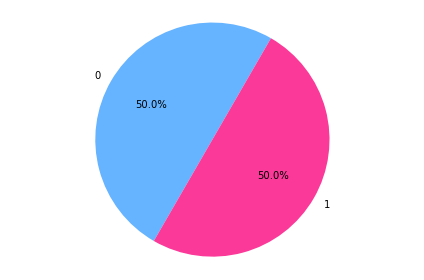

In [17]:
pie(data,"sentiment")

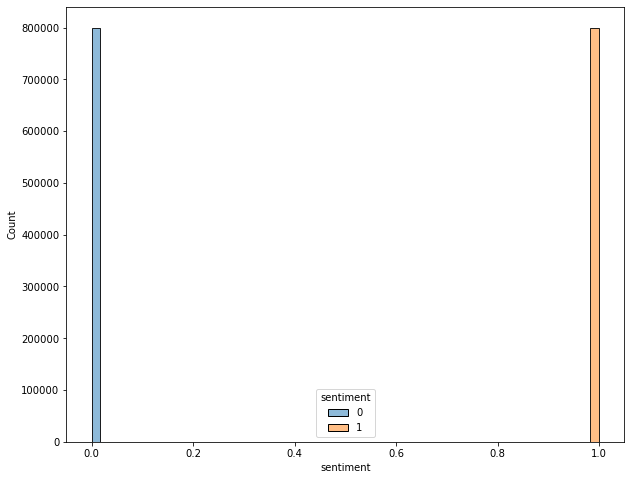

In [18]:
histo(data,"sentiment")

***Commentaire :***

- D'après les résultats obtenus, on peut conclure qu'on a ***une base de données équilibrée***.

### 2- La taille des commentaires <a class="anchor" id="section_4_2"></a>

Dans le but d'avoir une idée générale sur le comportement des utilisateurs, la taille des commentaires peut nous donner un aperçu sur l'utilisation de la langue.

Or, même pour l'étape de la vectorisation des données, cette partie va nous donner une idée sur la taille des vecteurs et même du vocabulaire.

In [19]:
def compte_mots(phrase):
    return len(phrase.split())

In [20]:
positive_data = data[data["sentiment"] == 0]

negative_data = data[data["sentiment"] == 1]

In [21]:
positive_data["Number_of_words"] = positive_data.Review.apply(lambda x: compte_mots(x))
negative_data["Number_of_words"] = negative_data.Review.apply(lambda x: compte_mots(x))

In [22]:
print("Le maximum de mots utilisé dans les reviews positives est :", max(positive_data.Number_of_words))
print("Le maximum de mots utilisé dans les reviews négatives est :", max(negative_data.Number_of_words))

Le maximum de mots utilisé dans les reviews positives est : 57
Le maximum de mots utilisé dans les reviews négatives est : 64


***Remarque :***

- Dans le but d'avoir une idée générale sur le comportement des gens qui laissent des commentaires positifs contre ceux qu'ils laissent des commentaires négatifs, nous allons visualiser le graphe suivant : 

(0.0, 200.0)

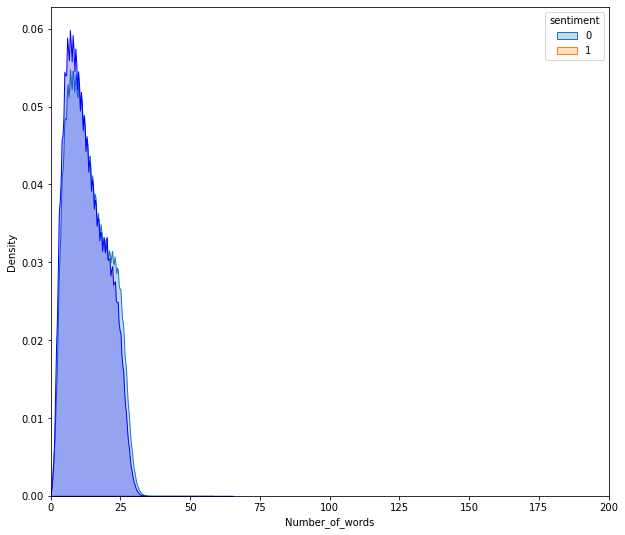

In [23]:
plt.figure(figsize=(10,9))

p1=sns.kdeplot(positive_data['Number_of_words'], hue = data['sentiment'],  shade=True, color="r")
p1=sns.kdeplot(negative_data['Number_of_words'], shade=True, color="b")

plt.xlim(0, 200)


***Commentaire :***

- On remarque qu'il y a le même comportement entre les utilisateurs.